## Resolución Espectral

Supongamos que se muestrea una señal a 1000 Hz. Tomamos distinta cantidad de muestras.

|   N    | t obs (ms)            | Δf (Hz) |
| :--:   | :-------------------: | :-----: |
|  128   |         128 ms        |  7.8125 |
|  256   |         256 ms        |  3.906  |
| 1024   |        1024 ms        |  0.976  |

Cuanto más largo es el tiempo observado (t obs), más estrecho es el espaciado entre los 'bins' de frecuencia (Δf). Es decir que el espectro se vuelve más "detallado".


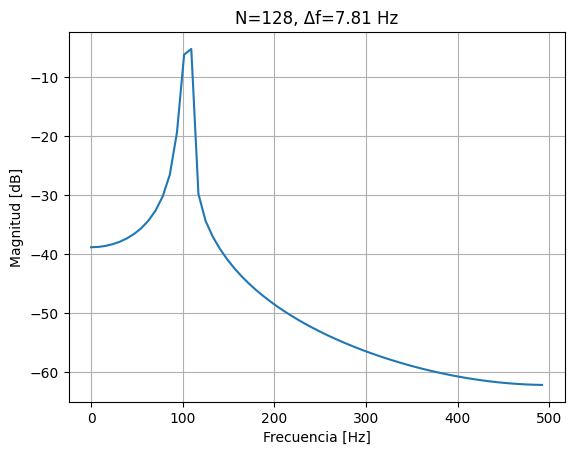

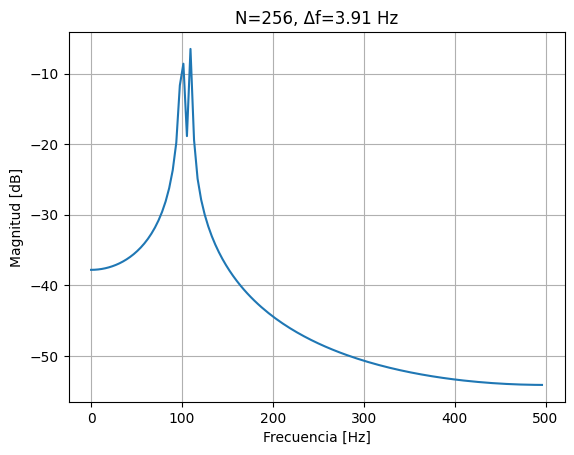

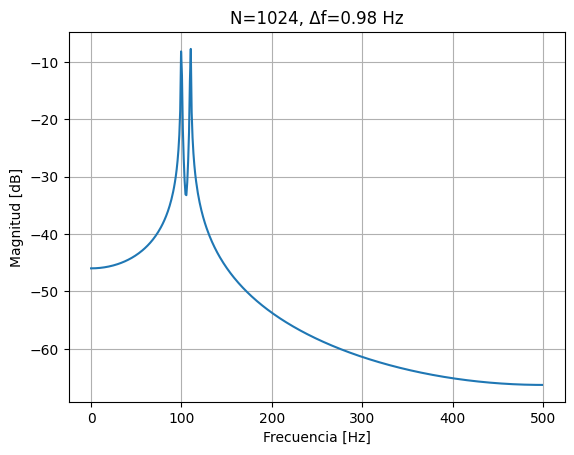

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # frecuencia de muestreo
f1, f2 = 100, 110  # dos senoidales cercanas (10 Hz de diferencia)

# Comparar distintos tamaños de ventana
for N in [128, 256, 1024]:
    t = np.arange(N) / fs
    x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
    X = np.fft.fft(x, n=N)
    f = np.arange(N) * fs / N

    plt.figure()
    plt.plot(f[:N//2], 20*np.log10(np.abs(X[:N//2])/N))
    plt.title(f"N={N}, Δf={fs/N:.2f} Hz")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud [dB]")
    plt.grid(True)
    plt.show()


### ¿Qué se observa?:

- Con N=128: los dos picos (100 Hz y 110 Hz) están casi pegados, no se distinguen.

- Con N=1024: aparecen claramente separados.

Esto visualiza la resolución espectral en acción.

## Leakage y Scalloping Loss

La DFT asume periodicidad, o sea que la ventana que tomamos se replica indefinidamente. El final de la ventana no encaja con su inicio, esto produce fuga hacia otros bins aledaños (Leakage).

Ocurre cuando el valor asociado a una cierta componente de frecuencia de la señal, no coincide exactamente con un bin calculado por la DFT.

La energía se reparte entre bins vecinos, por lo que la amplitud del principal se reduce (Scalloping Loss).

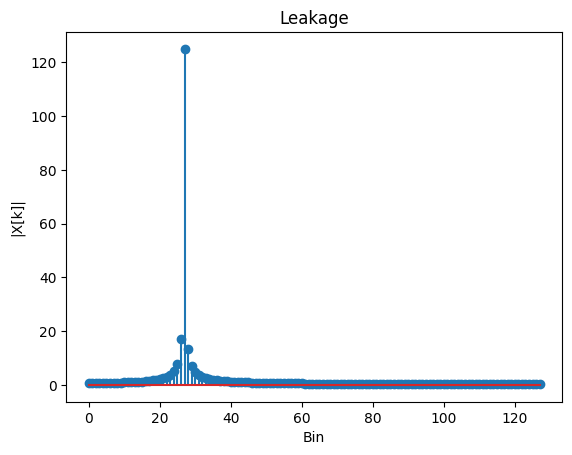

Amplitud máxima: 125.03681566140253


In [ ]:
fs = 1000
N = 256
# f0 = 10*fs/N   # coincide con un bin
f0 = 105  # No coincide con un bin
n = np.arange(N)
x = np.sin(2*np.pi*f0*n/fs)
X = np.fft.fft(x)

plt.stem(np.abs(X[:N//2]))
plt.title("Leakage")
plt.xlabel("Bin"); plt.ylabel("|X[k]|"); plt.show()
amplitud = np.amax(np.abs(X[:N//2]))
print(f"Amplitud máxima: {amplitud}")

## Time Windowing

Aplicar una ventana en el tiempo. Cada ventana tiene un comportamiento diferente, pero el objetivo de todas ellas es atenuar los lóbulos laterales. Esto lo hacen a costa de ensanchar el central.

/tmp/ipython-input-3015723172.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*np.log10(np.abs(W[:512])/np.max(np.abs(W))), label=wtype)


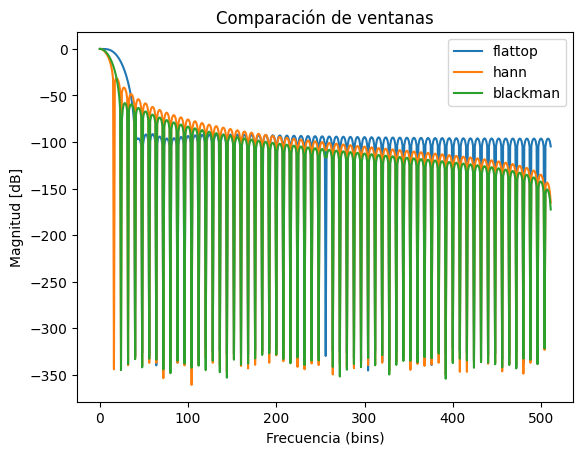

In [ ]:
from scipy.signal import get_window

N = 128
for wtype in ['flattop', 'hann', 'blackman']:
    w = get_window(wtype, N)
    W = np.fft.fft(w, 1024)
    plt.plot(20*np.log10(np.abs(W[:512])/np.max(np.abs(W))), label=wtype)

plt.title("Comparación de ventanas")
plt.xlabel("Frecuencia (bins)"); plt.ylabel("Magnitud [dB]")
plt.legend(); plt.show()


In [ ]:
import numpy as np

# Señal original
x = np.array([82, 44, 62, 79, 92, 74, 18, 41], dtype=complex)

# "Decimación" en el tiempo: pares e impares
x0 = x[0::2]  # muestras pares
x1 = x[1::2]  # muestras impares

# FFTs de longitud N/2
X0 = np.fft.fft(x0)
X1 = np.fft.fft(x1)

# Constantes
N = 8
k = np.arange(N//2)
W = np.exp(2j * np.pi / N)

# Combinación según mariposas (Radix-2)
X_upper = X0 + W**(-k) * X1
X_lower = X0 - W**(-k) * X1

# Resultado total de 8 puntos
X_manual = np.concatenate([X_upper, X_lower])

# Verificación con FFT estándar
X_fft = np.fft.fft(x)

# Mostrar resultados
np.set_printoptions(precision=3, suppress=True)
print("Resultado manual:")
print(X_manual)
print("\nResultado fft(x):")
print(X_fft)


Resultado manual:
[492.    +0.j    -58.083-49.657j  94.    +2.j     38.083+38.343j
  16.    +0.j     38.083-38.343j  94.    -2.j    -58.083+49.657j]

Resultado fft(x):
[492.    +0.j    -58.083-49.657j  94.    +2.j     38.083+38.343j
  16.    +0.j     38.083-38.343j  94.    -2.j    -58.083+49.657j]
